In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import numpy as np

def load_data():
    X = np.load("X.npy")
    y = np.load("y.npy")
    print(f"Shape of X: {X.shape}")
    print(f"Shape of y: {y.shape}")
    return X, y

x_train, y_train = load_data()

Shape of X: (5000, 400)
Shape of y: (5000, 1)


In [5]:
batch = 10
def get_batch(data, label):
  ix = torch.randint(0, 4989, (batch, ) )
  x = x_train[ix]
  y = y_train[ix]
  return x, y

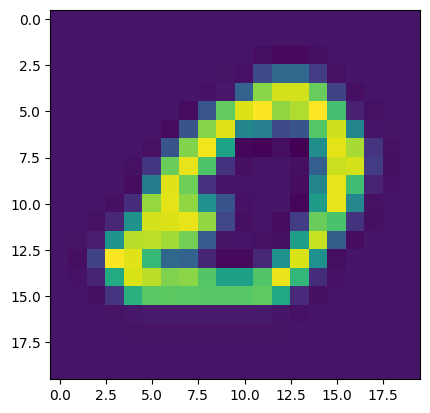

In [ ]:
plt.imshow(x[1].reshape(20, 20))
plt.show()

In [ ]:
g = torch.Generator().manual_seed(1667)
w = torch.randn((400, 10), dtype=torch.float32, generator=g,requires_grad=True)
b = torch.zeros(1, dtype=torch.float32, requires_grad=True)

In [ ]:
lossi = []
for i in range(1000):
  x, y = get_batch(x_train, y_train)
  x = torch.tensor(x).to(torch.float32)
  y = torch.tensor(y).to(torch.int64)

  out = x @ w + b
  out = torch.exp(out)
  out = out/out.sum(dim=1, keepdim=True)

  y = y.view(-1)
  probs = out[torch.arange(10), y].log().sum()
  loss = -1 * probs/batch
  if i%100 == 0:
    print(loss.item())
  lossi.append(loss.item())
  w.grad = None
  b.grad = None
  loss.backward()

  w.data += -0.01*w.grad
  b.data += -0.01*b.grad


6.946225643157959
7.4820122718811035
6.59616231918335
5.1956892013549805
6.228562355041504
3.1643009185791016
1.7336076498031616
5.597298622131348
2.8954358100891113
3.631784439086914


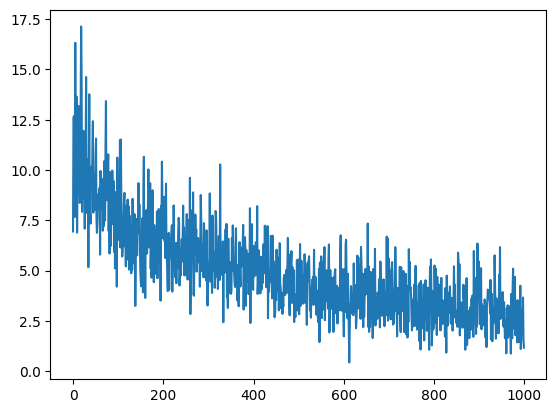

In [ ]:
plt.plot(lossi)

In [ ]:
optimizer = torch.optim.Adam([w, b], lr=0.001)
lossfunc = torch.nn.CrossEntropyLoss()

In [ ]:
g = torch.Generator().manual_seed(1667)
w = torch.randn((400, 10), dtype=torch.float32, generator=g,requires_grad=True)
b = torch.zeros(1, dtype=torch.float32, requires_grad=True)

In [ ]:
lossi = []
for i in range(1000):
  x, y = get_batch(x_train, y_train)
  x = torch.tensor(x).to(torch.float32)
  y = torch.tensor(y).to(torch.int64)

  out = x @ w + b
  # out = torch.exp(out)
  # out = out/out.sum(dim=1, keepdim=True)

  # y = y.view(-1)
  # probs = out[torch.arange(10), y].log().sum()
  # loss = -1 * probs/batch
  # if i%100 == 0:
  #   print(loss.item())
  # lossi.append(loss.item())
  # w.grad = None
  # b.grad = None
  # loss.backward()

  # w.data += -0.01*w.grad
  # b.data += -0.01*b.grad
  y = y.view(-1)
  loss = lossfunc(out, y)
  if i%100 == 0:
    print(loss.item())
  lossi.append(loss.item())

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

10.845422744750977
8.841157913208008
5.436795234680176
2.8286476135253906
3.7023441791534424
4.0153093338012695
1.595880150794983
3.8272337913513184
1.381801724433899
2.5976312160491943


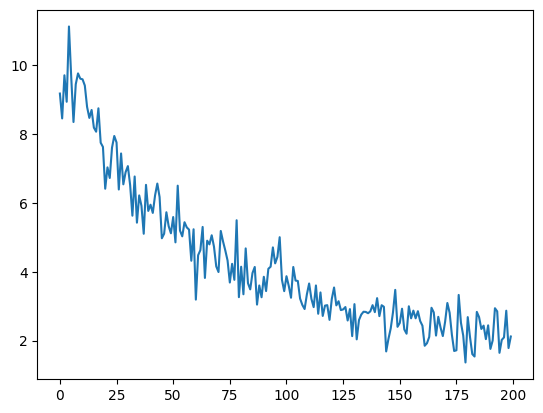

In [ ]:
plt.plot(torch.tensor(lossi).view(-1, 5).mean(1))

Implementing Multi-layer Network

In [ ]:
relu = torch.nn.ReLU()

In [ ]:
g2 = torch.Generator().manual_seed(1667+10)

w1 = torch.randn((400, 25), generator=g2, dtype=torch.float64,requires_grad=True)
b1 = torch.zeros(1, requires_grad = True)

w2 = torch.randn((25, 15), generator=g2, dtype=torch.float64, requires_grad=True)
b2 = torch.zeros(1, requires_grad=True)

w3 = torch.randn((15, 10), generator=g2, dtype=torch.float64, requires_grad=True)
b3 = torch.zeros(1, requires_grad=True)

parameters = [w1, w2, w3, b1, b2, b3]
for p in parameters:
  p = p.to(torch.float64)

In [ ]:
lossi = []
batch = 10
for i in range(10000):
  x, y = get_batch(x_train , y_train)
  x = torch.tensor(x).to(torch.float64)
  y = torch.tensor(y).to(torch.int64).view(-1)

  # Forward pass
  out = x @ w1 + b1
  out = relu(out)

  a = out @ w2 + b2
  a = relu(a)

  logits = a @ w3 + b3

  logits = torch.exp(logits)
  probs = logits/logits.sum(dim=1, keepdim=True)

  prob = probs[torch.arange(batch), y].log().sum()
  loss = -1*prob/batch
  lossi.append(loss.item())

  if i < 7000:
    lr = 0.001
  else:
    lr = 0.0001
  if i%500 == 0:
    print(loss.item())
  for p in parameters:
    p.grad = None

  loss.backward()

  for p in parameters:
    p.data += -lr*p.grad


133.91763907835656
2.711830610744175
2.3025850929940455
2.3025850929940455
2.3025850929940455
5.1509577249497775
2.3025850929940455
2.3025850929940455
2.3025850929940455
2.3025850929940455
2.3025850929940455
2.3025850929940455
2.3025850929940455
2.3025850929940455
2.3025850929940455
2.07238650377763
2.3025850929940455
2.3025850929940455
2.3025850929940455
2.3025850929940455


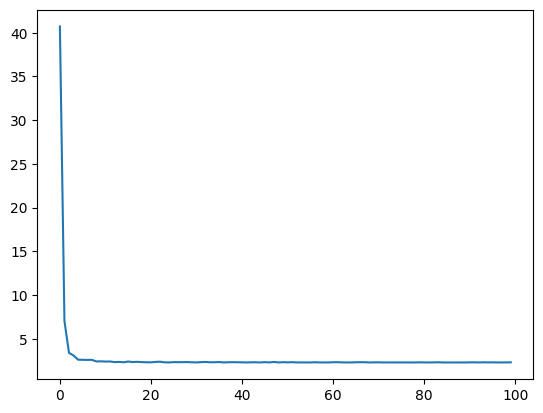

In [ ]:
plt.plot(torch.tensor(lossi).view(-1, 100).mean(1))

In [128]:
g2 = torch.Generator().manual_seed(43)

w1 = torch.randn((400, 25), generator=g2, dtype=torch.float64,requires_grad=True)
b1 = torch.zeros(1, requires_grad = True)

w2 = torch.randn((25, 15), generator=g2, dtype=torch.float64, requires_grad=True)
b2 = torch.zeros(1, requires_grad=True)

w3 = torch.randn((15, 10), generator=g2, dtype=torch.float64, requires_grad=True)
b3 = torch.zeros(1, requires_grad=True)

parameters = [w1, w2, w3, b1, b2, b3]
for p in parameters:
  p = p.to(torch.float64)

In [129]:
optimizer = torch.optim.Adam(parameters, lr=0.001)
lossfunc = torch.nn.CrossEntropyLoss()

In [130]:
lossi = []
batch = 10
for i in range(10000):
  x, y = get_batch(x_train , y_train)
  x = torch.tensor(x).to(torch.float64)
  y = torch.tensor(y).to(torch.int64).view(-1)

  # Forward pass
  out = x @ w1 + b1
  out = relu(out)

  a = out @ w2 + b2
  a = relu(a)

  logits = a @ w3 + b3
  probs = torch.nn.Softmax(dim=1)

  loss = lossfunc(logits, y)
  if i%1000 == 0:
    print(loss.item())
  lossi.append(loss.item())

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

76.96210176864598
4.282707092418596
1.966192084202482
2.102675637159605
2.0380477542019566
0.9173030371365144
1.3884288757406806
1.1362856350187402
0.7095886839535585
1.9820358511969345


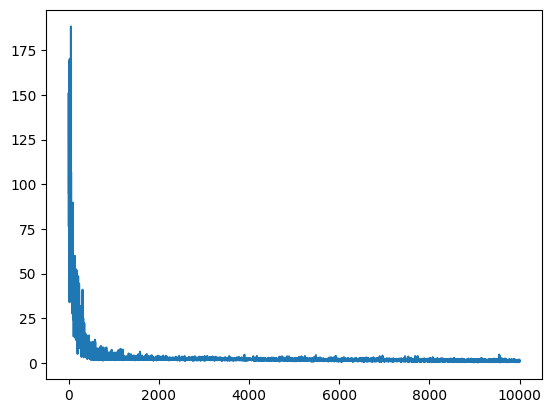

In [131]:
plt.plot(lossi)

In [6]:
class model(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.l1 = torch.nn.Linear(400, 25, dtype=torch.float64,bias=True)
    self.l2 = torch.nn.Linear(25, 15, dtype=torch.float64, bias=True)
    self.l3 = torch.nn.Linear(15, 10, dtype = torch.float64, bias=True)
    self.relu = torch.nn.ReLU()

  def forward(self, x):
    x = self.l1(x)
    x = self.relu(x)
    x = self.l2(x)
    x = self.relu(x)
    x = self.l3(x)
    return x

m = model()
lossfunc = torch.nn.CrossEntropyLoss()
optimizer1 = torch.optim.Adam(m.parameters(), lr=0.001)

In [8]:
lossi = []
for i in range(1000):
  x, y = get_batch(x_train, y_train)
  x = torch.tensor(x).to(torch.float64)
  y = torch.tensor(y).to(torch.int64).view(-1)

  out = m(x)
  loss = lossfunc(out, y)
  if i%100 == 0:
    print(loss.item())
  lossi.append(loss.item())

  optimizer1.zero_grad()
  loss.backward()
  optimizer1.step()

2.3305124603363043
1.8503407881712128
1.0521299643814908
0.6589688556374808
0.5632884994884209
0.5576082549885275
0.5929585177263741
0.32059877286025873
0.3369228075583901
0.3707733109361204


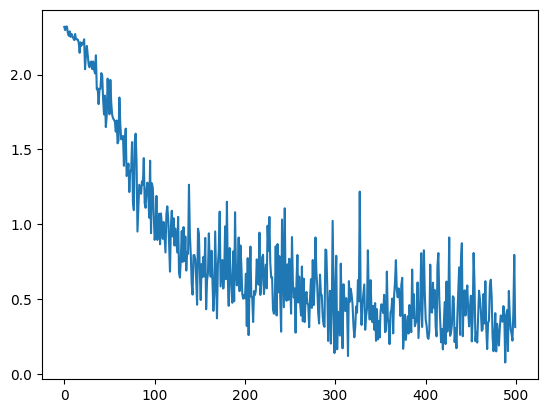

In [12]:
plt.plot(torch.tensor(lossi).view(500, -1).mean(1))